# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [12]:
import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

First, create some useful functions

In [13]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

#a = np.array(np.arange(36))
#print a

#b = np.reshape(a, (4,3,3))
#print b[0,:,:]
#print b[1,:,:]

#c = build_grid_of_images(b)
#print c

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

Load the `mnist` dataset and normalize in the range [0, 1]

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print n_train, 'train samples'
print n_test, 'test samples'

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the CNN and show its architecture

In [15]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Convolution2D(9, 5, 5, border_mode='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Convolution2D(9, 5, 5, border_mode='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Convolution2D(16, 3, 3, border_mode='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(input=l0, output=l5)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l0 (InputLayer)              (None, 28, 28, 1)         0         
_________________________________________________________________
l1 (Conv2D)                  (None, 28, 28, 9)         234       
_________________________________________________________________
l1_mp (MaxPooling2D)         (None, 14, 14, 9)         0         
_________________________________________________________________
l2 (Conv2D)                  (None, 14, 14, 9)         2034      
_________________________________________________________________
l2_mp (MaxPooling2D)         (None, 7, 7, 9)           0         
_________________________________________________________________
l3 (Conv2D)                  (None, 7, 7, 16)          1312      
_________________________________________________________________
l3_mp (MaxPooling2D)         (None, 3, 3, 16)          0         
__________

/Users/nkcr/anaconda/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, (5, 5), padding="same", activation="relu", name="l1")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nkcr/anaconda/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, (5, 5), padding="same", activation="relu", name="l2")`
  
/Users/nkcr/anaconda/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same", activation="relu", name="l3")`
  if __name__ == '__main__':
/Users/nkcr/anaconda/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("l5..., inputs=Tensor("l0...)`


Define some constants and train de CNN

In [16]:
batch_size = 128
n_epoch = 10
print(X_train.shape)
#model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
#history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=n_epoch, verbose=1, validation_data=(X_test, Y_test))

(60000, 28, 28, 1)


Show the performance of the model

('Test score:', 0.037023998715693597)
('Test accuracy:', 0.98829999999999996)


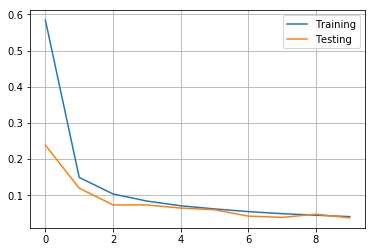

In [6]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [7]:
pred = model.predict_on_batch(X_test)
print pred

[[  4.65322329e-11   5.05278479e-07   4.25616633e-07 ...,   9.99998569e-01
    3.14854781e-10   4.39529373e-07]
 [  1.04482993e-07   2.26100783e-05   9.99977231e-01 ...,   2.45051035e-10
    9.55712398e-10   3.39862600e-12]
 [  3.55574389e-06   9.99911547e-01   1.46706327e-06 ...,   4.56761882e-05
    4.88224487e-07   6.64256959e-07]
 ..., 
 [  3.40821094e-13   9.53331192e-09   2.22152279e-11 ...,   5.58966606e-09
    6.89949964e-09   2.07449602e-07]
 [  4.98370810e-06   2.86746604e-09   1.84408366e-09 ...,   1.73233788e-11
    2.52967025e-03   9.45053600e-08]
 [  1.42036115e-05   3.31840710e-07   4.34176218e-06 ...,   3.62720742e-10
    4.91684068e-06   5.00925466e-07]]


Confusion matrix

In [8]:
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 977,    0,    1,    1,    0,    0,    1,    0,    0,    0],
       [   0, 1132,    1,    0,    2,    0,    0,    0,    0,    0],
       [   3,    8, 1014,    0,    0,    0,    0,    5,    1,    1],
       [   0,    0,    0, 1000,    0,    3,    0,    4,    3,    0],
       [   1,    0,    0,    0,  978,    0,    1,    0,    0,    2],
       [   1,    0,    0,    7,    0,  878,    1,    1,    1,    3],
       [   5,    5,    0,    0,    2,    3,  942,    0,    0,    1],
       [   0,    2,    4,    0,    3,    0,    0, 1016,    1,    2],
       [   3,    0,    1,    2,    0,    0,    1,    3,  960,    4],
       [   3,    2,    0,    1,    9,    1,    0,    6,    1,  986]])